# Name - SANJOG MOHANTY

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("Iris.csv")      # loading the Csv file through pandas library
df.head(5)      

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape    # no. of row and no. of columns 

(150, 6)

In [5]:
df.describe()       # overall distrubution of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()/df.shape[0]     # checking for missing values 

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [7]:
df=df.drop('Id',axis=1) # droping the ID column 

In [8]:
df.Species.unique()    # checking the no. of Category from Species columns i.e Target variable

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

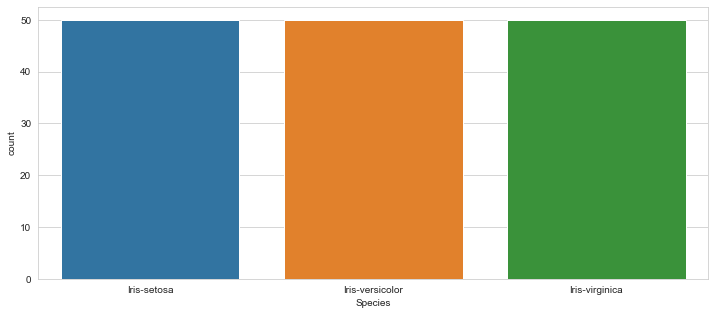

In [9]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot('Species',data=df)        # checking the distribution of three Category from Target variables

# BIVARIATE ANALYSIS

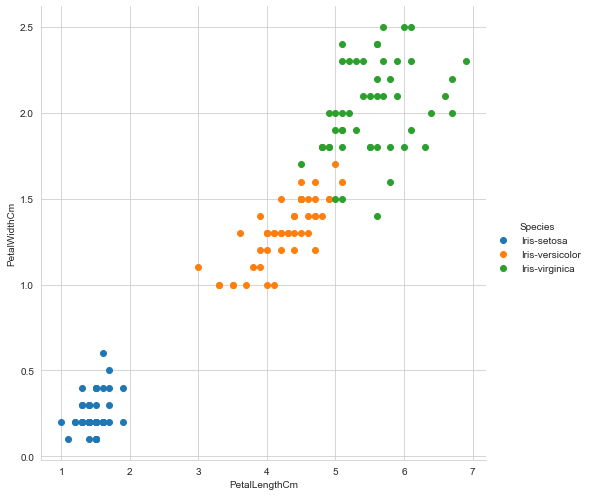

In [9]:
sns.FacetGrid(df,hue="Species",size=7).map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend();
plt.show()

# MULTIVARIATE ANALYSIS

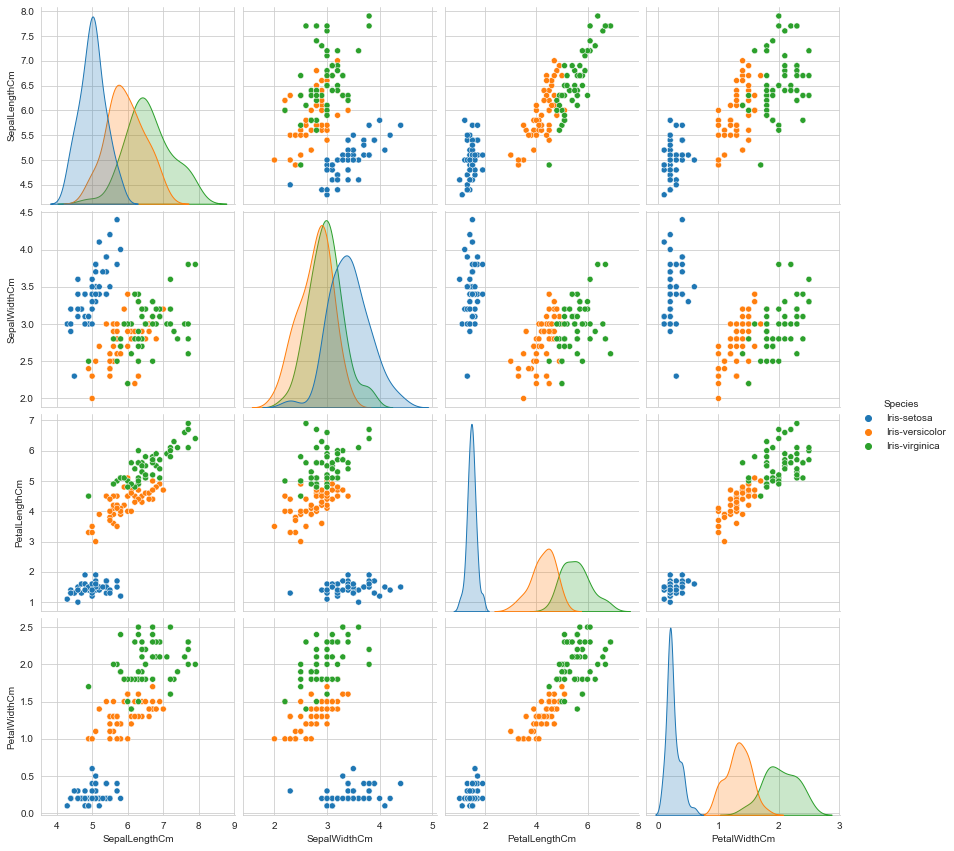

In [10]:
sns.pairplot(df,hue="Species",size=3)

In [10]:
x=df.drop("Species",axis=1)   # Independent variables 
y=df['Species']   # target variable 

In [11]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [12]:
SC=StandardScaler()

In [13]:
# convert the numerical variable to a stanadarized form -2 to 2

scalar_data=SC.fit_transform(x)

In [15]:
scalar_data     # -2 to 2

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
X=pd.DataFrame(scalar_data,index=x.index,columns=x.columns)

In [18]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# spliting the variables for training and testing 

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# model creation

model=DecisionTreeClassifier(random_state=0)

In [24]:
# model Training 

model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
# prediction from test variable 
Pred_y=model.predict(x_test)

In [26]:
Pred_y

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [27]:
y_test.values

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# Accuracy of the model 

print("Accuracy:",accuracy_score(y_test, Pred_y)*100)

Accuracy: 97.36842105263158


# Visualization of Decision tree Classification 

In [30]:
from sklearn import tree

[Text(334.8, 489.24, 'PetalWidthCm <= -0.524\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 380.52000000000004, 'PetalLengthCm <= 0.677\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(167.4, 271.8, 'PetalWidthCm <= 0.593\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'SepalWidthCm <= 0.106\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(669.6, 271.8, 'PetalWidthCm <= 0.725\ngini = 0

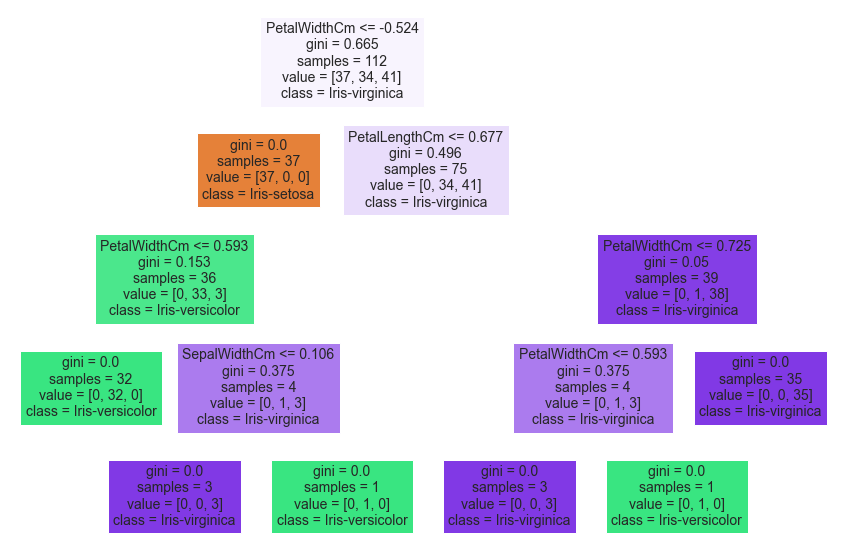

In [31]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=x.columns,class_names=list(y.unique()))